In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [8]:
data = pd.read_csv("/Users/mithi/Downloads/SMSSpamCollection", sep='\t')
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
col=data.columns
print('Number of columns :', len(col))

Number of columns : 2


In [21]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


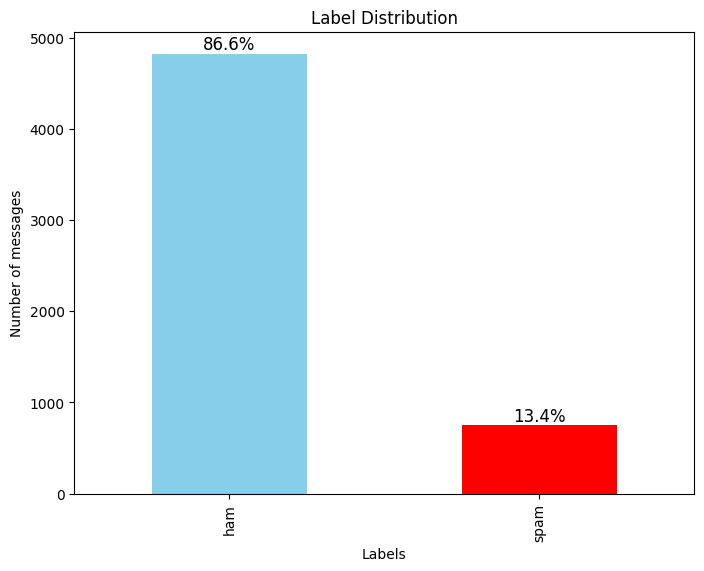

In [36]:
labels=data['label'].value_counts()
total= len(data)

ax = labels.plot(kind='bar', color=['skyblue', 'red'], figsize=(8,6))
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Number of messages")

for p in ax.patches:
    ax.annotate(f'{p.get_height()/total*100:.1f}%', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.show()

In [33]:
data['length'] = data['message'].apply(len)
print(data['length'].describe())

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64


In [34]:
print(data.loc[data['length'].idxmax()])

label                                                    ham
message    For me the love should start with attraction.i...
length                                                   910
Name: 1085, dtype: object


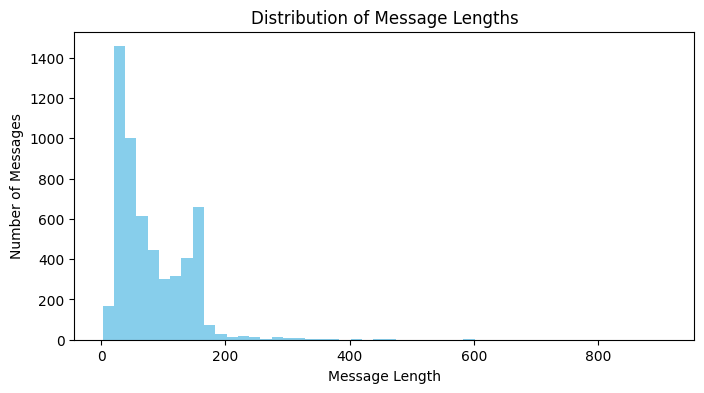

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(data['length'], bins=50, color='skyblue')
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Number of Messages")
plt.show()


In [42]:
data['num_uppercase'] = data['message'].apply(lambda x: sum(1 for c in x if c.isupper()))
print(data['num_uppercase'].describe())

count    5572.000000
mean        5.633345
std        11.711637
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       138.000000
Name: num_uppercase, dtype: float64


In [45]:
data['extra_spaces'] = data['message'].apply(lambda x: len(x) - len(x.lstrip()) + len(x) - len(x.rstrip())) 
print(data['extra_spaces'].describe())

count    5572.000000
mean        0.034996
std         0.190501
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: extra_spaces, dtype: float64


In [47]:
data['message_clean'] = data['message'].str.lower().str.strip()
data[['message', 'message_clean']].head(10)

,message,message_clean
0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling it's been 3 week's n...
6,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me. ...
7,As per your request 'Melle Melle (Oru Minnamin...,as per your request 'melle melle (oru minnamin...
8,WINNER!! As a valued network customer you have...,winner!! as a valued network customer you have...
9,Had your mobile 11 months or more? U R entitle...,had your mobile 11 months or more? u r entitle...


In [48]:
all_words = data['message_clean'].str.split().explode()
print("Total tokens:", len(all_words))
print("Unique tokens:", all_words.nunique())
print(all_words.value_counts().head(20))

Total tokens: 86909
Unique tokens: 13579
to      2237
i       2217
you     1921
a       1433
the     1329
u        998
and      968
is       869
in       859
my       755
for      704
your     677
of       614
me       611
have     571
call     559
on       521
are      487
that     470
it       466
Name: message_clean, dtype: int64
